## Importing the dataset through Keras

In [2]:
from keras.datasets import mnist

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Library imports

In [3]:
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the dataset

Each image has a label associated with it denoting the correct digit that's drawn

In [4]:
(train_imgs,train_lbls),(test_imgs,test_lbls)=mnist.load_data()

There are 10 classes to classify the images into (0-9)

In [5]:
classes=np.unique(train_lbls)
nClasses=len(classes)
nClasses

10

Shape of the test and train labels to see how many test and train images we have

In [6]:
print(len(test_lbls))
print(len(train_lbls))

10000
60000


In [7]:
dimdata=np.prod(train_imgs.shape[1:]) #28*28
dimdata

784

In [8]:
train_imgs[0].shape

(28, 28)

Number of training images (60,000), and each image has dimensions 28x28

In [9]:
train_imgs.shape

(60000, 28, 28)

Flattening the images (since neural networks cannot take 2D input directly)

In [10]:
train_data = train_imgs.reshape(train_imgs.shape[0], dimdata)
test_data = test_imgs.reshape(test_imgs.shape[0], dimdata)

In [11]:
train_data.shape

(60000, 784)

In [12]:
#converting to float
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

Converting values to lie between 0 and 1 (since they are currently digits between 0 and 255, denoting how black each pixel is)

In [13]:
train_data /= 255
test_data /= 255

Keras uses one hot encoding

Hence changing the labels from integer to categorical data

In [14]:
train_labels_one_hot = to_categorical(train_lbls)
test_labels_one_hot = to_categorical(test_lbls)
 
#Display the change for category label using one-hot encoding
print('Original label : ', train_lbls[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label :  4
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Making the Keras Model

In [32]:
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(dimdata,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(nClasses,activation='softmax'))

**We add 2 dense layers that are fully interconnected. These perform linear operations**

The last Dense layer has 10 units (since we need to classify into 10 classes (0-9))

### Compiling the model, using RMSProp optimizer, with a categorical crossentropy loss so we can predict into multiple classes

In [34]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=["accuracy"])

### Fitting out data onto the model, with 256 images at a time, for 20 epochs.
We use the test data as validation

In [35]:
history=model.fit(x=train_data,y=train_labels_one_hot,batch_size=256,epochs=20,verbose=1,validation_data=(test_data,test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.3064 - acc: 0.9069 - val_loss: 0.1601 - val_acc: 0.9502
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1118 - acc: 0.9654 - val_loss: 0.1021 - val_acc: 0.9683
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0727 - acc: 0.9780 - val_loss: 0.0799 - val_acc: 0.9754
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0519 - acc: 0.9837 - val_loss: 0.0862 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0378 - acc: 0.9880 - val_loss: 0.0921 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0284 - acc: 0.9910 - val_loss: 0.0834 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0223 - acc: 0.9925 - val_loss: 0.0856 - val_a

### Plotting the training and validation losses, to see if the model is being overfitted.

Text(0.5,1,'Accuracy Curves')

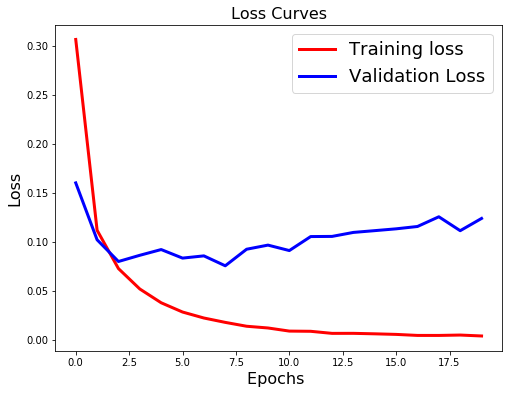

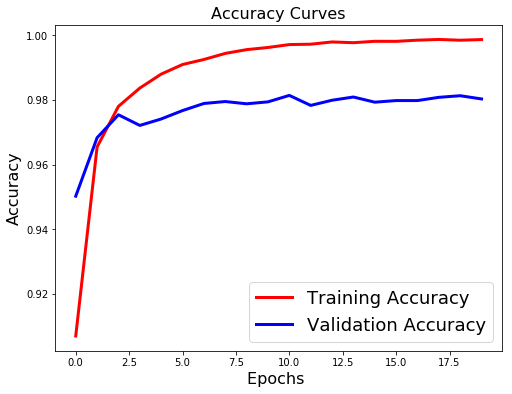

In [37]:
%matplotlib inline
#Checking for overfitting

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

**We can see that the validation accuracy is far from the training accuracy**

This means that our model won't perform very well on unknown data.

### Reducing overfitting:

In [15]:
#To reduce overfitting
from keras.layers import Dropout

model2=Sequential()
model2.add(Dense(512,activation='relu',input_shape=(dimdata,)))
model2.add(Dropout(0.5))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nClasses,activation='softmax'))

### Testing with this new network

In [16]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2=model2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


InternalError: Blas GEMM launch failed : a.shape=(256, 784), b.shape=(784, 512), m=256, n=512, k=784
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_39, dense_1/kernel/read)]]
	 [[Node: dense_3/BiasAdd/_45 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_84_dense_3/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_1/MatMul', defined at:
  File "C:\Everything\Software\Python\Anaconda\Files\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Everything\Software\Python\Anaconda\Files\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "C:\Everything\Software\Python\Anaconda\Files\lib\asyncio\base_events.py", line 1425, in _run_once
    handle._run()
  File "C:\Everything\Software\Python\Anaconda\Files\lib\asyncio\events.py", line 127, in _run
    self._callback(*self._args)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-6064703ad0fc>", line 5, in <module>
    model2.add(Dense(512,activation='relu',input_shape=(dimdata,)))
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\keras\models.py", line 467, in add
    layer(x)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\keras\engine\topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\keras\layers\core.py", line 855, in call
    output = K.dot(inputs, self.kernel)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\keras\backend\tensorflow_backend.py", line 1075, in dot
    out = tf.matmul(x, y)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 2436, in _mat_mul
    name=name)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(256, 784), b.shape=(784, 512), m=256, n=512, k=784
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_39, dense_1/kernel/read)]]
	 [[Node: dense_3/BiasAdd/_45 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_84_dense_3/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


### Plotting the training and validation losses, to see if the model is being overfitted.

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

**Much better now, less overfitting, validation loss is not increasing,**

This model is generally better for unseen data

### Testing the accuracy of our model

In [ ]:
print("Accuracy of the model: %.2f%%"%(model2.evaluate(test_data, test_labels_one_hot)[1]*100))

### Plotting some image predictions from our neural model

In [ ]:
img_shape=(28,28)
plt.figure(figsize=(15, 15))
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(np.argmax(cls_true[i]), cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [17]:
images = test_data[:9]
cls_true = test_labels_one_hot[:9]

In [ ]:
y_pred=model2.predict(x=images)
cls_pred=np.argmax(y_pred,axis=1)

In [ ]:
plot_images(images=images,
            cls_true=cls_true,
           cls_pred=cls_pred)

### Hence we have used Neural Networks to successfully predict handwritten image classes, with pretty high accuracy